idx: 36 z: 1092.0
dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])
0.00999841834604315


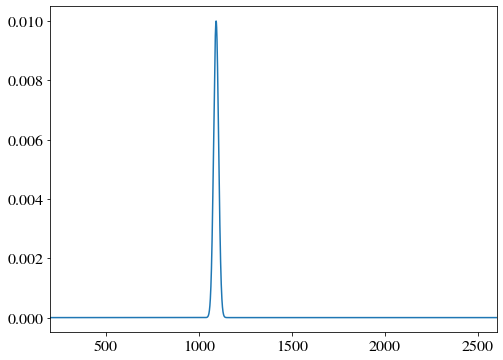

In [3]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

N = 100
zmin_pert = 300
zmax_pert = 2500

dz = 1.0*(zmax_pert - zmin_pert)/N
pivots = np.zeros(N)

for i in np.arange(0, N):
    pivots[i] = zmin_pert + i*dz

pivots = np.array(pivots)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

pert_idx, pert_z = find_nearest(pivots, 1100)

amp_array = np.zeros(N)
amp_array[pert_idx] = .01
#amp_array[0] = .1


amp_arrstr = np.char.mod('%f', amp_array)
amp_str = ",".join(amp_arrstr)

#print(amp_array[112])
common_settings = {'output' : 'tCl',
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   #'tau_reio':0.05430842,
                   'thermodynamics_verbose':1,
                   'reio_parametrization': 'reio_none',
                   'perturb_xe': 'yes',
                   'xe_pert_num': N,
                   'zmin_pert': zmin_pert,
                   'zmax_pert': zmax_pert,
                   'xe_pert_amps': amp_str
                   }  

M = Class.Class()
M.set(common_settings)
M.compute()

thermo = M.get_thermodynamics()
print (thermo.keys())

fig, ax = plt.subplots()
print(np.max(thermo['xe_pert']))
ax.plot(thermo['z'], thermo['xe_pert'])
#ax.plot(thermo['z'], thermo['x_fid'])
#ax.set_xscale('log')
ax.set_xlim([200, 2600])
plt.show()

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

In [16]:
amplitudes=np.linspace(-.1, .1, 21)

gcls = []
gll = np.zeros(2500)
for qi in amplitudes:
    amp_array = np.zeros(N)
    amp_array[pert_idx] = qi
    #amp_array[0] = .1


    amp_arrstr = np.char.mod('%f', amp_array)
    amp_str = ",".join(amp_arrstr)

    #print(amp_array[112])
    common_settings = {'output' : 'tCl,pCl,lCl',
                       # LambdaCDM parameters
                       'h':0.6781,
                       'omega_b':0.02238280,
                       'omega_cdm':0.1201075,
                       'A_s':2.100549e-09,
                       'n_s':0.9660499,
                       'lensing': 'yes',
                       #'tau_reio':0.05430842,
                       'thermodynamics_verbose':1,
                       'reio_parametrization': 'reio_none',
                       'perturb_xe': 'yes',
                       'xe_pert_num': N,
                       'zmin_pert': zmin_pert,
                       'zmax_pert': zmax_pert,
                       'xe_pert_amps': amp_str
                       }  

    M = Class.Class()
    M.set(common_settings)
    M.compute()

    cls = M.lensed_cl(2500)
    gll = cls['ell'][2:]
    gcls.append(cls['tt'][2:])

gcls = np.stack(gcls)

mputing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1089.095665
    corresponding to conformal time = 280.588447 Mpc
    with comoving sound horizon = 144.482235 Mpc
    angular diameter distance = 12.724855 Mpc
    sound horizon angle 100*theta_s = 1.041590
    Thomson optical depth crosses one at z_* = 1089.752682
    giving an angle 100*theta_* = 1.041169
 -> baryon drag stops at z = 1059.952008
    corresponding to conformal time = 286.310056 Mpc
    with comoving sound horizon rs = 147.068649 Mpc
 -> no reionization requested, optical depth = 0.000000
Computing thermodynamics using HyRec 2020
 -> with primordial helium mass fraction Y_He = 0.2454
 -> recombination (maximum of visibility function) at z = 1089.266698
    corresponding to conformal time = 280.555602 Mpc
    with comoving sound horizon = 144.467348 Mpc
    angular diameter distance = 12.722889 Mpc
    sound horizon ang

(21, 2499)


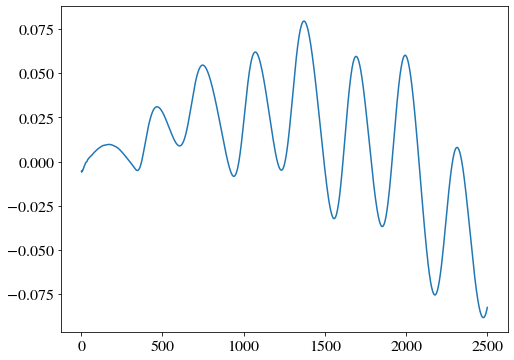

In [27]:
fig,ax = plt.subplots()

fid = gcls[10]

print(gcls.shape)

derivs = np.gradient(gcls, .01, axis=0)

response = derivs[10]/fid

ax.plot(gll, response)
plt.show()

In [ ]:
M = Class.Class()
M.set(common_settings)
M.compute()